In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Mutual Information For Regression

In [2]:
df=pd.read_csv('./dataset/Car Price.csv')

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#We Are Taking Only Numerical Feature

In [6]:
num_df=df.select_dtypes(['int64','float64'])

In [7]:
num_df.drop('car_ID',axis=1,inplace=True)
num_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
#Seperating The Depedant and Indepedant Feature
X=num_df.drop('price',axis=1)
y=num_df['price']

In [9]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print('Shape of X_train',X_train.shape,
      '\nShape of X_test',X_test.shape)

Shape of X_train (164, 14) 
Shape of X_test (41, 14)


In [10]:
#feature Selection Using Mutual Info Regression
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X_train,y_train)

In [11]:
mutual_info

array([0.1807683 , 0.51941185, 0.4992282 , 0.67902927, 0.32445587,
       0.85823768, 0.80856312, 0.40420304, 0.28891326, 0.13820452,
       0.82741522, 0.1584681 , 0.69781596, 0.87214616])

In [12]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns

In [13]:
#Sorting Columns As Per Values
mutual_info.sort_values(ascending=False)

highwaympg          0.872146
curbweight          0.858238
horsepower          0.827415
enginesize          0.808563
citympg             0.697816
carwidth            0.679029
wheelbase           0.519412
carlength           0.499228
boreratio           0.404203
carheight           0.324456
stroke              0.288913
symboling           0.180768
peakrpm             0.158468
compressionratio    0.138205
dtype: float64

<AxesSubplot: >

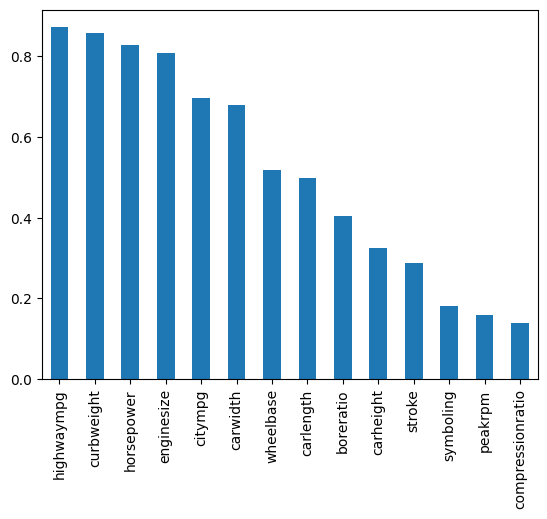

In [14]:

mutual_info.sort_values(ascending=False).plot(kind='bar')

In [15]:
#Selecting Top 30 Percentile Values using Selectpercentile method
from sklearn.feature_selection import SelectPercentile
percentile=SelectPercentile(mutual_info_regression,percentile=30)
percentile.fit(X_train,y_train)

SelectPercentile(percentile=30,
                 score_func=<function mutual_info_regression at 0x000001C592D90AE0>)

In [16]:
percentile.get_support()

array([False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True])

In [17]:
X_train.columns[percentile.get_support()]

Index(['curbweight', 'enginesize', 'horsepower', 'highwaympg'], dtype='object')

Above are the top 30 Percentile depedant feature

In [18]:
#Using Selectbest method
from sklearn.feature_selection import SelectKBest
best5=SelectKBest(mutual_info_regression,k=5)
best5.fit(X_train,y_train)

SelectKBest(k=5,
            score_func=<function mutual_info_regression at 0x000001C592D90AE0>)

In [19]:
X_train.columns[best5.get_support()]

Index(['curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg'], dtype='object')

## Mutual Information For Classification

In [20]:
#importing the wine dataset
df=pd.read_csv('./dataset/wine-class.csv')


In [21]:
df

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   class                          178 non-null    int64  
 1   alcohol                        178 non-null    float64
 2    malic_acid                    178 non-null    float64
 3    ash                           178 non-null    float64
 4    alcalinity_of_ash             178 non-null    float64
 5    magnesium                     178 non-null    int64  
 6    total_phenols                 178 non-null    float64
 7    flavanoids                    178 non-null    float64
 8    nonflavanoid_phenols          178 non-null    float64
 9    proanthocyanins               178 non-null    float64
 10   color_intensity               178 non-null    float64
 11   hue                           178 non-null    float64
 12   od280/od315_of_diluted_wines  178 non-null    flo

In [23]:
#Seperate The Depedant and Indepedant feature
X=df.drop('class',axis=1)
y=df['class']

In [24]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print('Shape of X_train',X_train.shape,
      '\nShape of X_test',X_test.shape)

Shape of X_train (142, 13) 
Shape of X_test (36, 13)


In [25]:
#feature Selection Using Mutual Info Classification
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,y_train)

In [26]:
mutual_info

array([0.41218892, 0.28916883, 0.10256664, 0.24031709, 0.18439994,
       0.45429675, 0.66890239, 0.10374568, 0.2388918 , 0.53621684,
       0.48804397, 0.4870916 , 0.59427215])

We have got 13 feature 

In [27]:
#converting into series
mutual_info=pd.Series(mutual_info)
#assigning the column names
mutual_info.index=X_train.columns

In [28]:
#Sorting The Values AS Per Importance
mutual_info.sort_values(ascending=False)

 flavanoids                      0.668902
 proline                         0.594272
 color_intensity                 0.536217
 hue                             0.488044
 od280/od315_of_diluted_wines    0.487092
 total_phenols                   0.454297
alcohol                          0.412189
 malic_acid                      0.289169
 alcalinity_of_ash               0.240317
 proanthocyanins                 0.238892
 magnesium                       0.184400
 nonflavanoid_phenols            0.103746
 ash                             0.102567
dtype: float64

<AxesSubplot: >

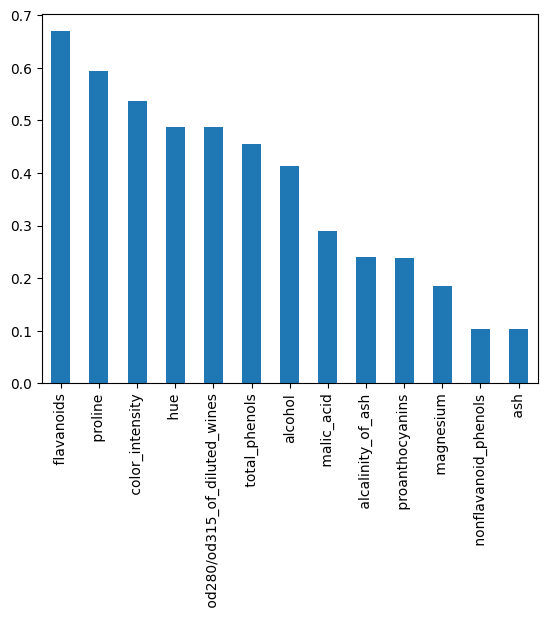

In [29]:
mutual_info.sort_values(ascending=False).plot(kind='bar')

In [30]:
#From The Above 13 Features We will Select Best 7 Features
from sklearn.feature_selection import SelectKBest
best7=SelectKBest(mutual_info_classif,k=7)
best7.fit(X_train,y_train)

SelectKBest(k=7,
            score_func=<function mutual_info_classif at 0x000001C592D90B80>)

In [31]:
best7.get_support()

array([ True, False, False, False, False,  True,  True, False, False,
        True,  True,  True,  True])

In [32]:
#To Convert True False Into The Column Names
X_train.columns[best7.get_support()]

Index(['alcohol', ' total_phenols', ' flavanoids', ' color_intensity', ' hue',
       ' od280/od315_of_diluted_wines', ' proline'],
      dtype='object')

These are top 7 feature, and we can use it for the model training